# Notebook de d'analyse exploratoire
### Sommaire : 
- [1 - Import packages](#1)
- [2 - Import data](#2)
    - [2.1 - Import échantillons + rapide analyse](#2.1)
    - [2.2 - Import toutes les données](#2.2)
- [3- Analyse](#3)
    - [3.1 - Analyse données manquantes](#3.1)
    - [3.2 - Analyse de la cible](#3.2)
    - [3.3 - Analyse données temporelles](#3.3)
    - [3.4 - Analyse données quantitatives](#3.4)
    - [3.5 - Analyse données catégorielles](#3.5)
        - [3.5.1. Analyse données catégorielles hors location](#3.5.1)
        - [3.5.2. Analyse donnée location](#3.5.2)
        - [3.5.3. Regroupement des catégories de faible volume](#3.5.3)
- [4. Métrique weighted log-loss](#4)

# 1 - Import packages <a name="1"></a>

In [5]:
import pandas as pd
import missingno as msno
pd.options.display.max_columns = 100
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import log_loss
from utils import *

# 2 - Import data<a name="2"></a>

## 2.1- Import échantillons + rapide analyse<a name="2.1"></a>

In [6]:
train = pd.read_csv('data/train.csv', nrows=1000)
test = pd.read_csv('data/test.csv', nrows=1000)
print(f"Shape of train dataset: {train.shape}")
print(f"Shape of test dataset : {test.shape}")

Shape of train dataset: (1000, 24)
Shape of test dataset : (1000, 23)


In [7]:
train.head()

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,id_group_2,favorite_fruit,fruit_situation_id,fruit_situation_label,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type,target
0,a46cfa61ea20a,f,2019-03-13 11:14:42.549,-1,NaN,52,70,G,2019-01-17 10:50:57.767,2d7e206d46ea1,36bac09400660,poire,120,jzy,NaN,-1,812a43d710ace,2019-03-13 11:14:42.549,football,aa8f4934a31eb,NaN,f,NaN,0
1,c3d0cb8f0c5e2,f,2019-03-21 14:27:32.441,-1,NaN,78,10,A,2018-08-20 05:57:51.038,35e96d6848871,80a697d593706,clementine,10,ae,NaN,-1,4b59257f24573,2019-03-21 14:27:32.441,football,6ff9ea9ec85fd,NaN,f,NaN,1
2,05dfbe0ec3a8b,f,2019-03-15 17:49:50.67,-1,NaN,70,10,A,2018-12-20 13:45:51.752,ffaf8085e383d,c309176b96268,clementine,200,ag,NaN,-1,f1a838f0d194b,2019-03-15 17:49:50.67,football,6a49a0a97b049,NaN,f,NaN,0
3,952e869ee1076,f,2019-01-07 08:19:29.114,-1,f,84,10,A,2018-07-21 10:28:49.386,5360cf0a40ce3,13c1a3597648b,clementine,10,ae,NaN,0,c3196847d1c14,2019-01-07 08:19:29.114,football,d0dcf1ca1bf04,NaN,f,NaN,1
4,5bd0e71b1395b,f,2019-02-03 17:57:22.926,-1,NaN,29,20,D,2018-12-07 19:59:26.968,126c3211f23fc,7b68e0a456571,clementine,10,ae,NaN,-1,70e18c6fe58cd,2019-02-03 17:57:22.926,football,b4870b1c8eb42,NaN,f,NaN,1


In [8]:
train.describe(include='all')

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,id_group_2,favorite_fruit,fruit_situation_id,fruit_situation_label,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type,target
count,1000,1000,1000,1000.000000,385,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000.000000,939,327,1000.000000,1000,1000,1000,1000,335,1000,23,1000.000000
unique,1000,2,1000,NaN,2,NaN,NaN,11,962,962,962,2,NaN,16,2,NaN,410,1000,2,962,124,2,3,NaN
top,32b55b03b8ea4,f,2019-02-08 10:32:05.938,NaN,f,NaN,NaN,A,2018-09-30 07:36:19.419,3b135b0691669,db820e01cf4f6,clementine,NaN,ag,f,NaN,be575dcfff16d,2019-02-08 10:32:05.938,football,7c5e6a2b60e90,Saint-Étienne,f,salad,NaN
freq,1,997,1,NaN,359,NaN,NaN,575,3,3,3,751,NaN,407,275,NaN,15,1,993,3,24,977,11,NaN
mean,NaN,NaN,NaN,-0.361000,NaN,5737.573000,26.260000,NaN,NaN,NaN,NaN,NaN,117.840000,NaN,NaN,-0.543000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.713000
std,NaN,NaN,NaN,3.930156,NaN,41986.684423,27.705234,NaN,NaN,NaN,NaN,NaN,83.782778,NaN,NaN,0.876881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764994
min,NaN,NaN,NaN,-1.000000,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,-1.000000,NaN,34.000000,10.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,-1.000000,NaN,60.000000,10.000000,NaN,NaN,NaN,NaN,NaN,160.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,-1.000000,NaN,81.000000,30.000000,NaN,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


#### == Analyse == 
- Les identifiants (pas pris en compte dans l'étude exploratoire) sont : id, id_group, id_group_2, id_group_3, id_group_4
- Les variables date sont : creation_date_answer, creation_date_global, creation_date_request
- Les variables catégorielles sont : AP, ctc, gc_label, favorite_fruit, fruit_situation_label, fruits_or_vegetables, hobby, ville, green_vegetables, vegetable_type
- Les variables quantitatives sont : situation, location, gc_id, fruit_situation_id, number_of_fruit. Une variable "location" en tant que variable quantitative ne semble pas adéquat. Pareil pour gc_id et fruit_situation_id qui pourraient être des identifiants. Une rapide étude sera faite juste après
- La variable target : target

In [9]:
train.location.unique()

array([    52,     78,     70,     84,     29,     32,     96,     43,
           50,     47,      3,     60,     68,     95,      8,     34,
           93,     92,     45,     87,     14,     22,     33, 315670,
           51,     81,     36,    100,     69,     54,     39,     75,
       315710,     13,     10,     94,     80,     64,     58,     27,
            6,     88,     11,     18,     67,     89,     83,     26,
           38,     63,     35,     17,     73,     46,     61,     37,
           79,     99,     59,     72,      2,     16,     55,     71,
           15,     86,     53,     30,     28,     12,     66,     23,
           91,     57,     41,     74,     90,    101,     40,     31,
           25,      1,     85,     24,     97], dtype=int64)

In [10]:
test.location.unique()

array([   100,     95,     34,     45,     78,     72,     39,     86,
       315710,     81,     46,     79,     13,     92,     25,     70,
           36,     68,     16,     60,     80,     52,     94,     14,
           22,     38,     32,     75,     87,     66,     43,     35,
           90,     28,     11,     26,     69,     96,     93,      3,
            1,     30,     88,     54,     73,     61,     33,     63,
           29,     83,     85,      8,     55,     67,     50,     84,
           40,     18,      6,     71,     42,     51,     57,     62,
           31,    101,     47,     99,     27,     17,     21,     58,
           41, 315670,      2,     64,     10,     91,     23,     24,
           89,     44], dtype=int64)

#### == Analyse == 
La variable "location" contient les départements français. Elle doit être traitée comme une variable catégorielle et non quantitative (en int64)

In [11]:
train.gc_id.unique()

array([ 70,  10,  20,  30,  40, 100,  60,  90, 120,  50,  80], dtype=int64)

In [12]:
test.gc_id.unique()

array([ 40,  20, 100,  10, 120,  80,  70,  50,  60,  30], dtype=int64)

#### == Analyse == 
Malgré le fait que la variable se nomme "gc_id" (un identifiant), les valeurs de la variable laisse penser que ce n'en est pas un (peu de valeurs uniques contrairement à un vrai identifiant). Sans dictionnaire des données qui précise la définition exacte de la variable, on va prendre l'hypothèse que le nom de la variable n'est pas correct, et que c'est une variable quantitative. 

In [13]:
train.fruit_situation_id.unique()

array([120,  10, 200, 110, 170,  50, 160, 100,  80, 220, 130,  20, 190,
       180,  70, 150,  40], dtype=int64)

In [14]:
test.fruit_situation_id.unique()

array([120,  50, 200,  10, 170, 160, 180,  80, 110, 220, 100, 130, 190,
        60,  40,  30,  70, 210,  20,  90], dtype=int64)

#### == Analyse == 
Même remarque que pour "gc_id", on va la considérer comme une variable quantitative

## 2.2- Import toutes les données<a name="2.2"></a>

In [16]:
train = pd.read_csv('data/train.csv', dtype={'location':object,'target':object})
test = pd.read_csv('data/test.csv', dtype={'location':object})
print(f"Shape of train dataset: {train.shape}")
print(f"Shape of test dataset : {test.shape}")

Shape of train dataset: (25000, 24)
Shape of test dataset : (25000, 23)


# 3- Analyse<a name="3"></a>

## 3.1 - Analyse données manquantes<a name="3.1"></a>

<AxesSubplot:>

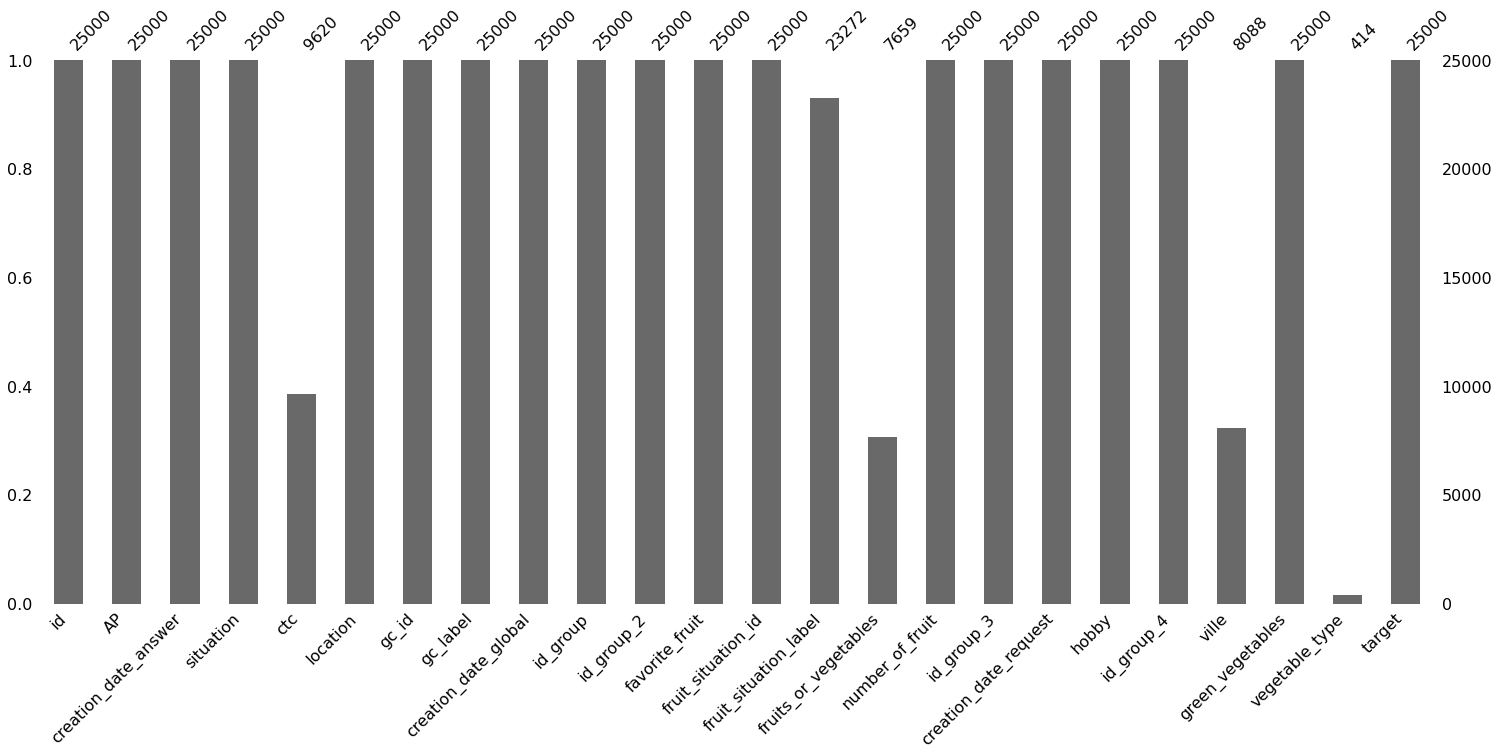

In [21]:
msno.bar(train)

<AxesSubplot:>

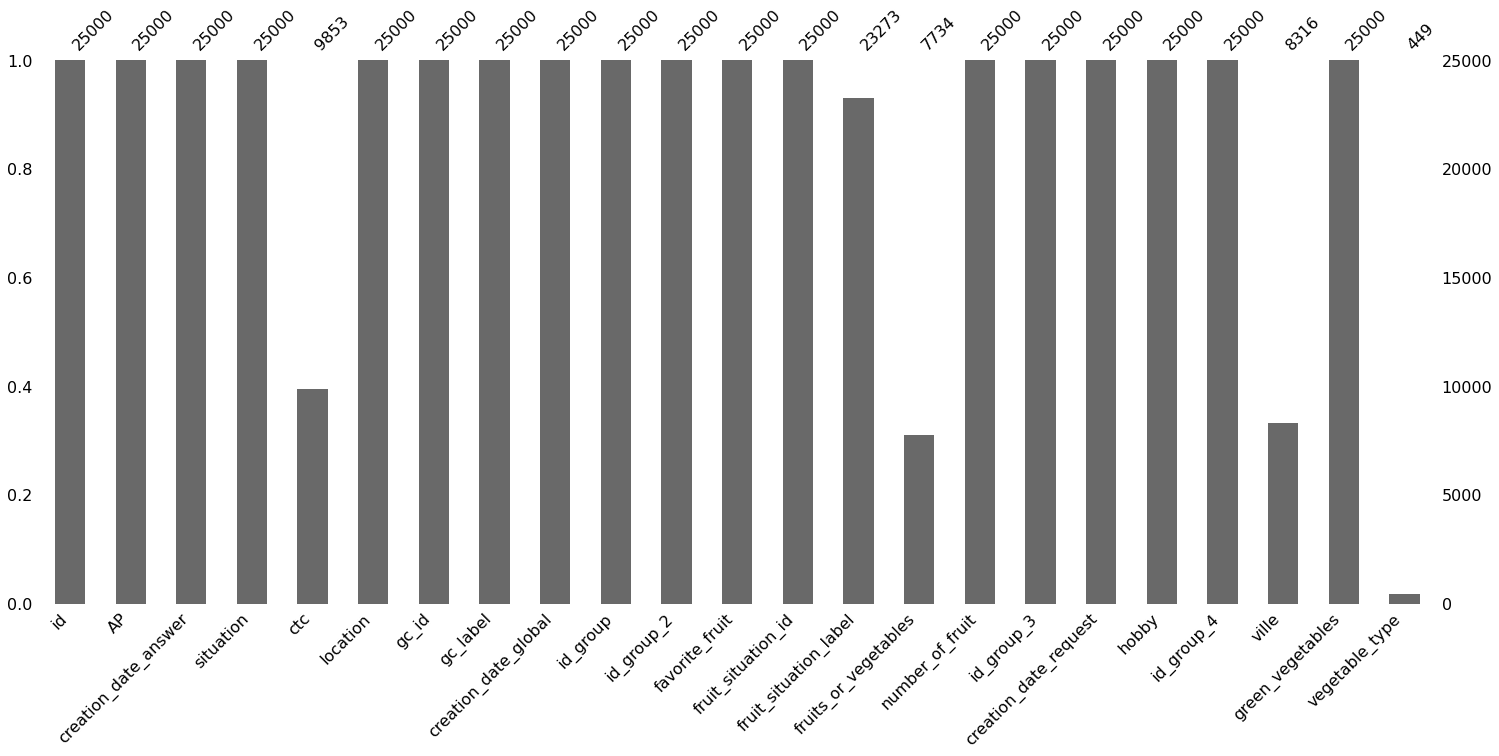

In [22]:
msno.bar(test)

### == Analyse == 
Les données sont présentes dans la majorité des variables. Les variables dont plus de la moitié des données sont manquantes seront supprimées : ctc, fruits_or_vegetables, ville, vegetable_type

## 3.2 - Analyse de la cible<a name="3.2"></a>

<AxesSubplot:xlabel='target', ylabel='count'>

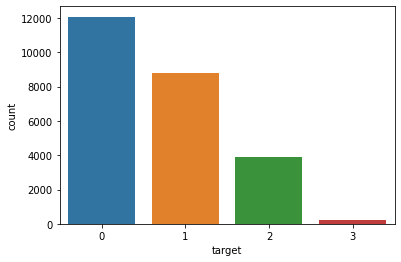

In [20]:
sns.countplot(data = train, x='target', order = train['target'].value_counts().index)

#### == Analyse == 
Les classes de la variable cible ne sont pas équilibrées, avec très peu de lignes pour la classe "3" qui semblerait être la classe la plus recherchée compte tenu du poids à mettre (1000) dans la weighted log-loss. 

## 3.3 - Analyse données temporelles<a name="3.3"></a>

In [23]:
cols_date = [col for col in train if 'date' in col]

In [24]:
cols_date

['creation_date_answer', 'creation_date_global', 'creation_date_request']

In [26]:
# Processing données temporelles
for col in cols_date:
    # Transformation en datetime
    train.loc[:, col] = pd.to_datetime(train.loc[:, col])
    # Récupération feature mois
    train.loc[:, col+"_month"] = train.loc[:, col].dt.month
    # Récupération feature jour de la semaine
    train.loc[:, col+"_weekday"] = train.loc[:, col].dt.weekday
    # Normalisation feature mois
    train.loc[:, col+"_month_norm"] = 2 * math.pi * train.loc[:, col+"_month"] / train.loc[:, col+"_month"].max()
    # Transformation par cosinus feature mois
    train.loc[:, col+"_month_cos"] = np.cos(train.loc[:, col+"_month_norm"])
    # Normalisation feature jour de la semaine
    train.loc[:, col+"_weekday_norm"] = 2 * math.pi * train.loc[:, col+"_weekday"] / train.loc[:, col+"_weekday"].max()
    # Transformation par cosinus feature jour de la semaine
    train.loc[:, col+"_weekday_cos"] = np.cos(train.loc[:, col+"_weekday_norm"])

### == Remarque == 
La features temporelles étant cycliques (samedi => ... mercredi ... => dimanche => samedi ou janvier => ... => juin => décembre => janvier), il faudrait les transformer en cosinus pour avoir cette propriété

In [45]:
liste_cols = [[col+"_month", col+"_weekday", col+"_weekday_cos", col+"_month_cos"] for col in cols_date]
flat_liste_cols = [item for sublist in liste_cols for item in sublist]

In [46]:
flat_liste_cols

['creation_date_answer_month',
 'creation_date_answer_weekday',
 'creation_date_answer_weekday_cos',
 'creation_date_answer_month_cos',
 'creation_date_global_month',
 'creation_date_global_weekday',
 'creation_date_global_weekday_cos',
 'creation_date_global_month_cos',
 'creation_date_request_month',
 'creation_date_request_weekday',
 'creation_date_request_weekday_cos',
 'creation_date_request_month_cos']

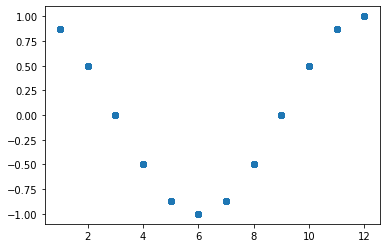

In [33]:
plt.scatter(x=train['creation_date_global_month'], y=train["creation_date_global_month_cos"])

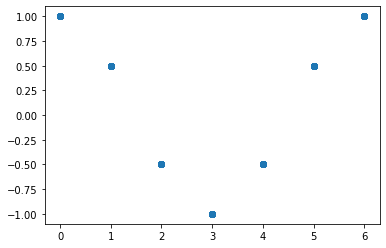

In [34]:
plt.scatter(x=train['creation_date_global_weekday'], y=train["creation_date_global_weekday_cos"])

#### == Analyse ==
La propriété cyclique est bien présente les mois 12 et 1 sont proches, idem pour les jours 6 et 0. On voit cependant que 2 dates (4 et 8) par exemple ont la même valeur. L'idéal est de rajouter une transformation en sinus également. 

In [39]:
sum(train['creation_date_answer'] == train['creation_date_request'])/len(train)

0.99872

In [42]:
(sum(train['creation_date_answer'] > train['creation_date_global']))/len(train)

0.9068

#### == Analyse ==
Les dates creation_date_answer et creation_date_request sont pratiquement les mêmes pour l'ensemble des lignes. L'analyse ne se fera ainsi que sur creation_date_answer.
La date creation_date_answer est à 90% supérieure à creation_date_global

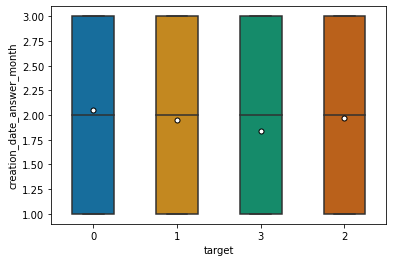

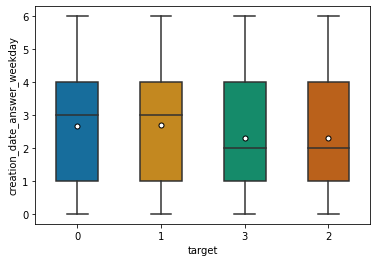

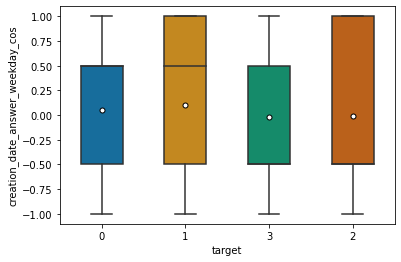

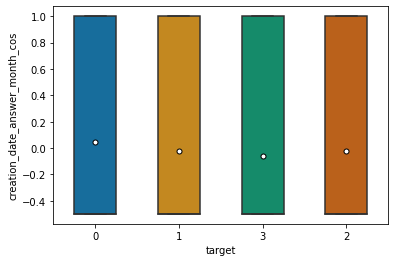

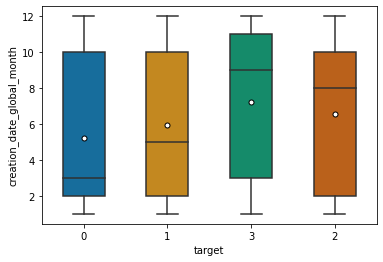

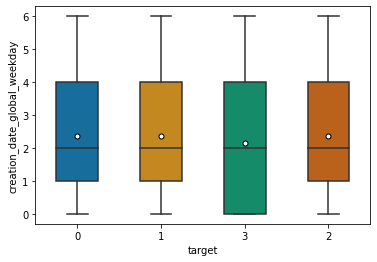

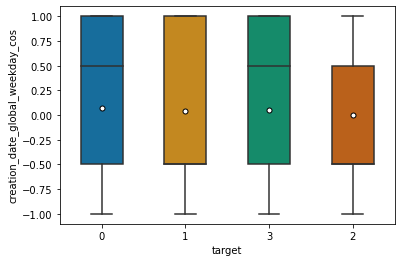

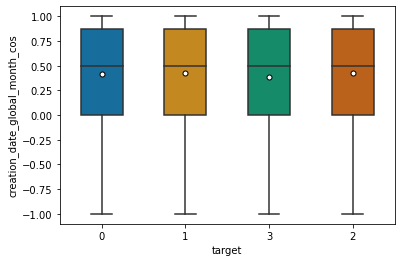

In [49]:
for col in flat_liste_cols:
    if "request" not in col:
        boxplot(train, col, 'target')

#### == Analyse == 
Les features temporelles qui semblent avoir un effet sur la target sont : 
- creation_date_answer_weekday
- creation_date_answer_weekday_cos
- creation_date_global_month
- creation_date_global_weekday
- creation_date_global_weekday_cos

## 3.4. Analyse données quantitatives<a name="3.4"></a>

In [53]:
cols_quant = ["situation", "gc_id", "fruit_situation_id", "number_of_fruit"]

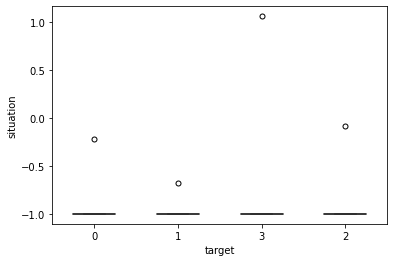

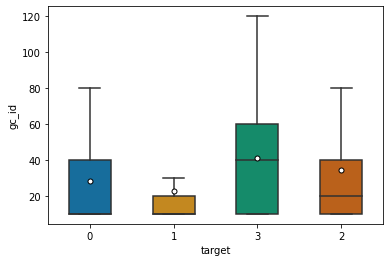

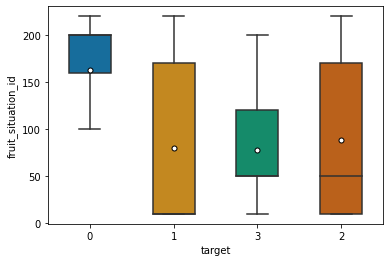

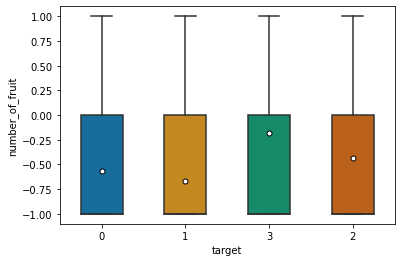

In [51]:
for col in cols_quant:
    boxplot(train, col, 'target')

#### == Analyse == 
Hormis la variable "situation", toutes les autres variables semblent avoir un effet sur la cible

## 3.5. Analyse données catégorielles<a name="3.5"></a>

### 3.5.1. Analyse données catégorielles hors location<a name="3.5.1"></a>

In [55]:
cols_cat = ["AP", "ctc", "gc_label", "favorite_fruit", "fruit_situation_label", "fruits_or_vegetables", "hobby", "green_vegetables", "vegetable_type"]

Variable étudiée : AP
target        0       1       2      3  Total
AP                                           
f       12044.0  8769.0  3868.0  233.0  24914
t          33.0    47.0     6.0    0.0     86
Total   12077.0  8816.0  3874.0  233.0  25000


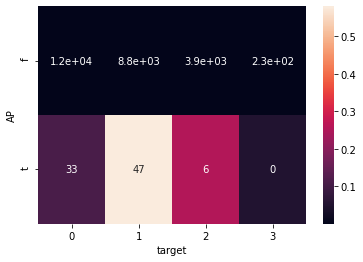

Variable étudiée : ctc
target     0     1     2   3  Total
ctc                                
f       4384  3134  1383  90   8991
t        354   130   139   6    629
Total   4738  3264  1522  96   9620


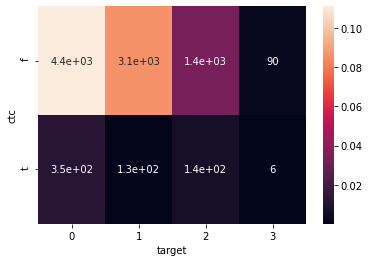

Variable étudiée : gc_label
target          0       1       2      3  Total
gc_label                                       
A          6645.0  5500.0  1604.0   64.0  13813
B          1020.0   510.0   683.0   69.0   2282
C           580.0   261.0   102.0    5.0    948
D          1650.0  1529.0   639.0   36.0   3854
E            56.0    64.0    32.0    1.0    153
F             9.0     2.0     2.0    0.0     13
G           324.0   148.0    51.0    2.0    525
H          1155.0   514.0   514.0   43.0   2226
I            89.0    39.0    36.0    0.0    164
J             2.0     0.0     0.0    0.0      2
K           152.0   132.0    44.0    0.0    328
L           395.0   117.0   167.0   13.0    692
Total     12077.0  8816.0  3874.0  233.0  25000


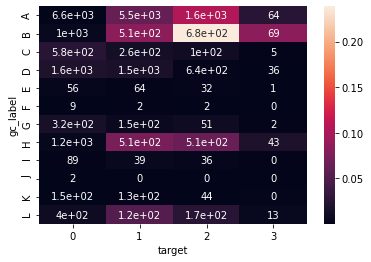

Variable étudiée : favorite_fruit
target              0     1     2    3  Total
favorite_fruit                               
clementine       8490  7234  2321  102  18147
poire            3587  1582  1553  131   6853
Total           12077  8816  3874  233  25000


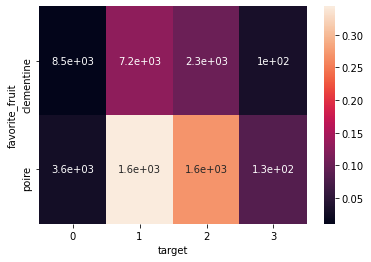

Variable étudiée : fruit_situation_label
target                       0       1       2      3  Total
fruit_situation_label                                       
KDT                       31.0    18.0     2.0    2.0     53
RG                        18.0    10.0    36.0    2.0     66
ae                      1226.0  4779.0  1142.0   44.0   7191
ag                      7629.0  2068.0   921.0   33.0  10651
dfhj                     156.0    33.0    29.0    1.0    219
fly                        3.0     3.0     3.0    2.0     11
fyi                       61.0    39.0     6.0    0.0    106
hetz                     152.0   370.0  1197.0  102.0   1821
jwn                       30.0    13.0     8.0    0.0     51
jy                        17.0     7.0     0.0    0.0     24
jyz                      141.0   265.0    83.0    3.0    492
jzy                      722.0   138.0    69.0    4.0    933
lfyi                       4.0     2.0     0.0    0.0      6
li                       119.0    37.0    23

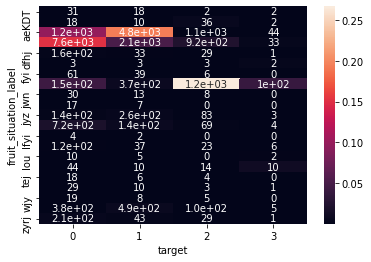

Variable étudiée : fruits_or_vegetables
target                   0     1     2   3  Total
fruits_or_vegetables                             
f                     3137  2298   918  41   6394
t                      619   415   210  21   1265
Total                 3756  2713  1128  62   7659


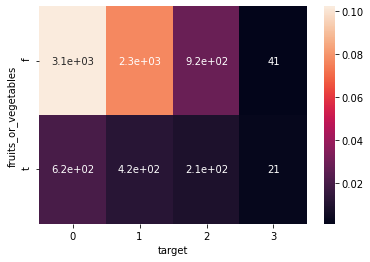

Variable étudiée : hobby
target            0       1       2      3  Total
hobby                                            
football    11908.0  8704.0  3816.0  233.0  24661
noball          4.0    20.0     5.0    0.0     29
volleyball    165.0    92.0    53.0    0.0    310
Total       12077.0  8816.0  3874.0  233.0  25000


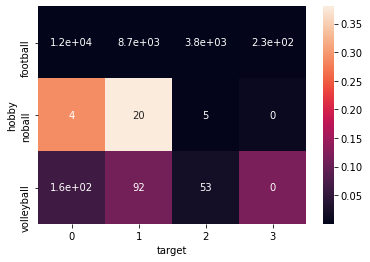

Variable étudiée : green_vegetables
target                0     1     2    3  Total
green_vegetables                               
f                 11889  8714  3741  220  24564
t                   188   102   133   13    436
Total             12077  8816  3874  233  25000


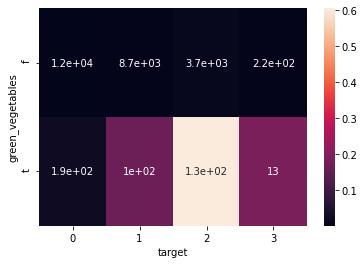

Variable étudiée : vegetable_type
target              0     1      2     3  Total
vegetable_type                                 
almostgreen       4.0   0.0    0.0   0.0      4
green           113.0  45.0   63.0   6.0    227
notsogreen        7.0  16.0   11.0   1.0     35
prettygreen       3.0   2.0    4.0   1.0     10
salad            53.0  31.0   44.0   5.0    133
verygreen         2.0   1.0    2.0   0.0      5
Total           182.0  95.0  124.0  13.0    414


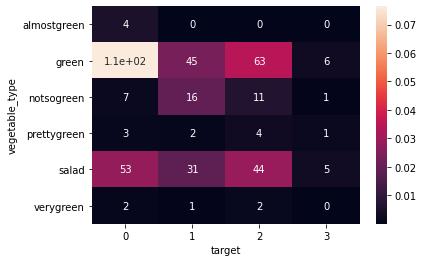

In [74]:
for col in cols_cat:
    print(f"Variable étudiée : {col}")
    cont_table = contingency_table(train, col, 'target')
    print(cont_table)
    heatmap(cont_table, train)

#### == Analyse == 
La méthode choisie est de calculer la table de contingence pour une variable catégorielle ainsi que la cible. Ensuite, la heatmap montre les contributions à la non-indépendance. Sommées, ces contributions donnent la statistique $\xi_{n}$ nécessaire pour le test statistique du $\chi^2$

L'analyse des variables donne : 
- variable AP : la catégorie t a une influence modérée sur la target 1 (0.53% vs. 0.34% sur l'ensemble de l'échantillon)
- variable ctc : non étudiée car contenant beaucoup de valeurs manquantes
- variable gc_label : par exemple, la catégorie B a une forte influence sur la target 2 (17.6% vs. 9.1% sur l'ensemble de l'échantillon)
- variable favorite_fruit : la catégorie clementine a une forte influence sur la target 1 (82.1% vs. 72.6% sur l'ensemble de l'échantillon)
- variable fruits_or_vegetables : non étudiée car contenant beaucoup de valeurs manquantes
- hobby : influence modérée
- green_vegetables : la catégorie t a une influence sur la target 2 (3.4% vs. 1.7% sur l'ensemble de l'échantillon)
- vegetable_type : non étudiée car contenant beaucoup de valeurs manquantes
- fruit_situation_label : la catégorie hetz a une forte influence sur la target 2 (32.5% vs. 7.8% sur l'ensemble de l'échantillon)

### 3.5.2. Analyse donnée location<a name="3.5.2"></a>

La variable location a plusieurs valeurs uniques (100aine de départements). L'analyse se fera plutôt sur les régions. On va d'abord récupérer le fichier des départements/régions de France depuis https://www.data.gouv.fr/fr/datasets/departements-de-france/

In [76]:
dept = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/70cef74f-70b1-495a-8500-c089229c0254', usecols=['code_departement', 'nom_region'])

In [78]:
train = train.merge(dept, how='left', left_on="location", right_on="code_departement")

target                            0       1       2      3  Total
nom_region                                                       
Auvergne-Rhône-Alpes          545.0  1211.0   263.0   26.0   2045
Bourgogne-Franche-Comté      1463.0   574.0    85.0   18.0   2140
Bretagne                      312.0   691.0    22.0    4.0   1029
Centre-Val de Loire           842.0   530.0   239.0   13.0   1624
Grand Est                    1697.0   655.0   370.0   13.0   2735
Hauts-de-France               977.0   165.0    92.0    4.0   1238
Normandie                     640.0   736.0   132.0   15.0   1523
Nouvelle-Aquitaine            896.0   466.0   318.0   15.0   1695
Occitanie                    1415.0  1290.0   435.0    9.0   3149
Pays de la Loire              104.0    60.0    43.0    0.0    207
Provence-Alpes-Côte d'Azur    848.0   480.0   424.0    4.0   1756
Île-de-France                1411.0  1171.0   917.0   93.0   3592
Total                       11150.0  8029.0  3340.0  214.0  22733


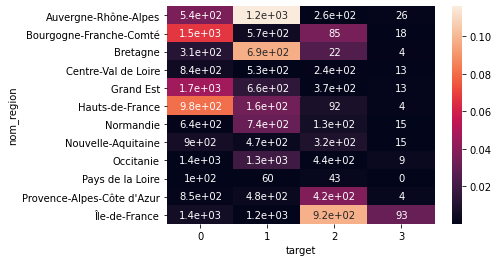

In [79]:
cont_table = contingency_table(train, "nom_region", 'target')
print(cont_table)
heatmap(cont_table, train)

#### == Analyse == 
Les régions ont une influence sur la target (Auvergne-Rhone-Alpes pour la target 1, Île-de-France pour la target 2...)

Ainsi toutes les variables catégorielles étudiées ci-dessus seront intégrées dans le modèle

### 3.5.3. Regroupement des catégories de faible volume<a name="3.5.3"></a>

L'idéal est de regrouper les catégories de faible volume pour diminuer la dimensionnalité. Par exemple, pour la variable fruit_situation_label il y a beaucoup de catégories avec un très faible volume (lfyi, fly...). La méthode de regrouper toutes les catégories qui sont présentes à moins de 0.5% est la suivante :  

In [88]:
seuil = 0.005

In [86]:
# value_counts
cnt = train.fruit_situation_label.value_counts(normalize=True)

In [87]:
cnt

ag      0.457674
ae      0.308998
hetz    0.078249
zht     0.042326
jzy     0.040091
jyz     0.021141
zyrj    0.012032
dfhj    0.009410
li      0.007949
fyi     0.004555
qg      0.003352
RG      0.002836
KDT     0.002277
jwn     0.002191
wfj     0.001848
wjy     0.001375
tej     0.001203
jy      0.001031
lou     0.000730
fly     0.000473
lfyi    0.000258
Name: fruit_situation_label, dtype: float64

In [89]:
vals = cnt[cnt > seuil].index

In [100]:
train['fruit_situation_label_group'] = train['fruit_situation_label'].where(train.fruit_situation_label.isin(vals), 'other')

In [101]:
print(f"On passe de {len(set(train['fruit_situation_label']))} à {len(vals)} catégories")

On passe de 22 à 9 catégories


# 4. Métrique weighted log-loss<a name="4"></a>

L'idée est de définir une fonction custom ``weighted_log_loss`` qui calcule la weighted log-loss en fonction de y_true et y_pred (probabilités) puis de l'encapsuler avec ``make_scorer`` de scikit-learn pour la modélisation. La fonction custom a été inspirée de la fonction log_loss de scikit-learn (https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/metrics/_classification.py#L2331) avec les weights en plus. 
Pour être sûr de la bonne implémentation, il y a une autre fonction custom sans les weights ``my_log_loss`` qui sera comparée à la log-loss de scikit-learn. 

In [2]:
y_true = ["1", "0", "0", "1"]
y_pred = [[.1, .9], [.9, .1], [.8, .2], [.35, .65]]

In [14]:
my_log_loss(y_true, y_pred), log_loss(y_true, y_pred)

(0.21616187468057912, 0.21616187468057912)

In [13]:
assert(my_log_loss(y_true, y_pred) == log_loss(y_true, y_pred))

Les deux fonctions donnent exactement les mêmes valeurs

In [9]:
weighted_log_loss(y_true, y_pred)

14.224845961187103

la pénalisation joue bien son rôle où la dernière prédiction de [.35, .65] fait augmenter la log_loss. Si on prend un autre exemple avec [.05, .95], la log_loss diminue

In [17]:
y_true = ["1", "0", "0", "1"]
y_pred = [[.1, .9], [.9, .1], [.8, .2], [.05, .95]]

In [18]:
weighted_log_loss(y_true, y_pred)

4.737605418564511